# INF250: Tasks week 7

In [20]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure, morphology, measure, segmentation
from skimage.color import label2rgb
import numpy as np

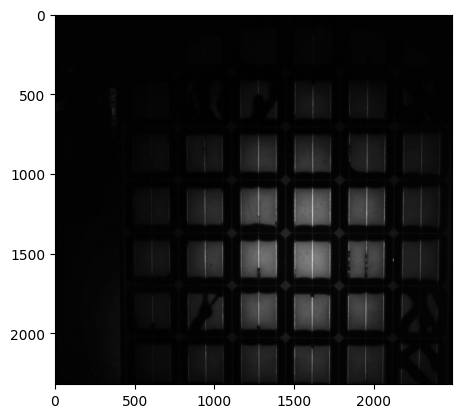

In [21]:
image = io.imread("images/UVfluorim.tif")
gray = color.rgb2gray(image)
gray = (gray * 255).astype(np.uint8)
plt.imshow(gray, cmap='gray')

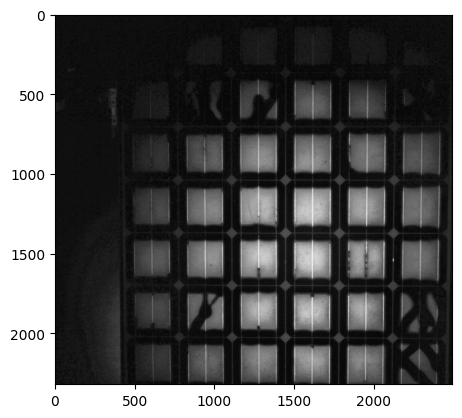

In [22]:
enhanced = exposure.equalize_adapthist(gray, clip_limit=0.03)
plt.imshow(enhanced, cmap='gray')

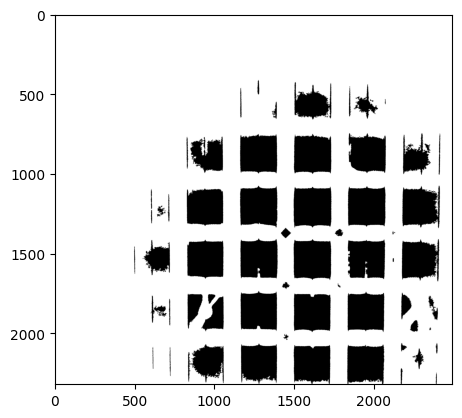

In [23]:
thresh = filters.threshold_otsu(enhanced)
binary = enhanced < thresh
cleaned = morphology.remove_small_objects(binary, min_size=100)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=100)
plt.imshow(cleaned, cmap='gray')

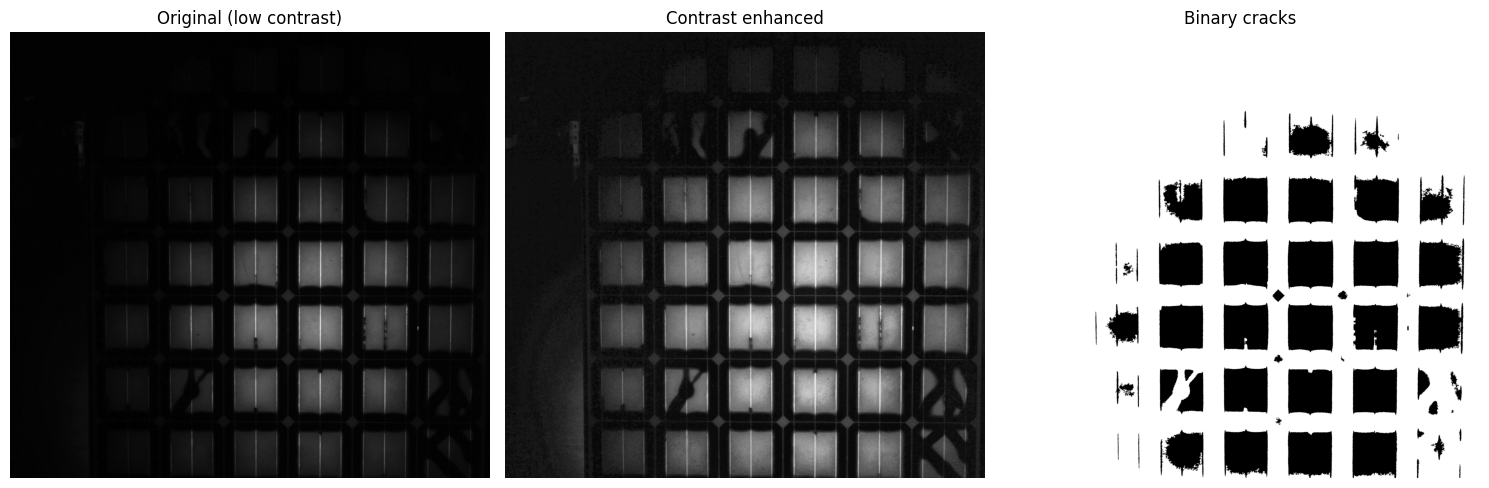

Detected 9 potential cracks


In [26]:
labels = measure.label(cleaned)
props = measure.regionprops_table(labels, properties=('area', 'perimeter'))

# --- 6. Plot results ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original (low contrast)')
ax[1].imshow(enhanced, cmap='gray')
ax[1].set_title('Contrast enhanced')
ax[2].imshow(cleaned, cmap='gray')
ax[2].set_title('Binary cracks')
for a in ax: a.axis('off')
plt.tight_layout()
plt.show()

# --- Print some stats ---
print(f"Detected {labels.max()} potential cracks")